# Outlier Analysis

### Importing Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

high_value_df = pd.read_csv('../data/processed/high_value_outliers.csv')
high_frequency_df = pd.read_csv('../data/processed/high_freq_outliers.csv')

In [12]:
high_frequency_df.set_index('Customer ID', inplace=True)
high_value_df.set_index('Customer ID', inplace=True)

### Segmenting 

In [13]:
overlap_df = high_frequency_df.index.intersection(high_value_df.index)

high_value_only = high_value_df.drop(overlap_df)
high_frequency_only = high_frequency_df.drop(overlap_df)
high_value_and_frequency = high_value_df.loc[overlap_df]

In [14]:
high_value_only['Segment'] = -1
high_frequency_only['Segment'] = -2
high_value_and_frequency['Segment'] = -3

outliers_segment_df = pd.concat([high_value_only, high_frequency_only, high_value_and_frequency])

In [15]:
outliers_segment_df.groupby('Segment').count()

,TotalSpent,Frequency,FirstInvoiceDate,LastInvoiceDate,CustomerLifespan,Recency
Segment,,,,,,
-3,226,226,226,226,226,226
-2,53,53,53,53,53,53
-1,197,197,197,197,197,197


### Visualizing Segment Spread by RFM features

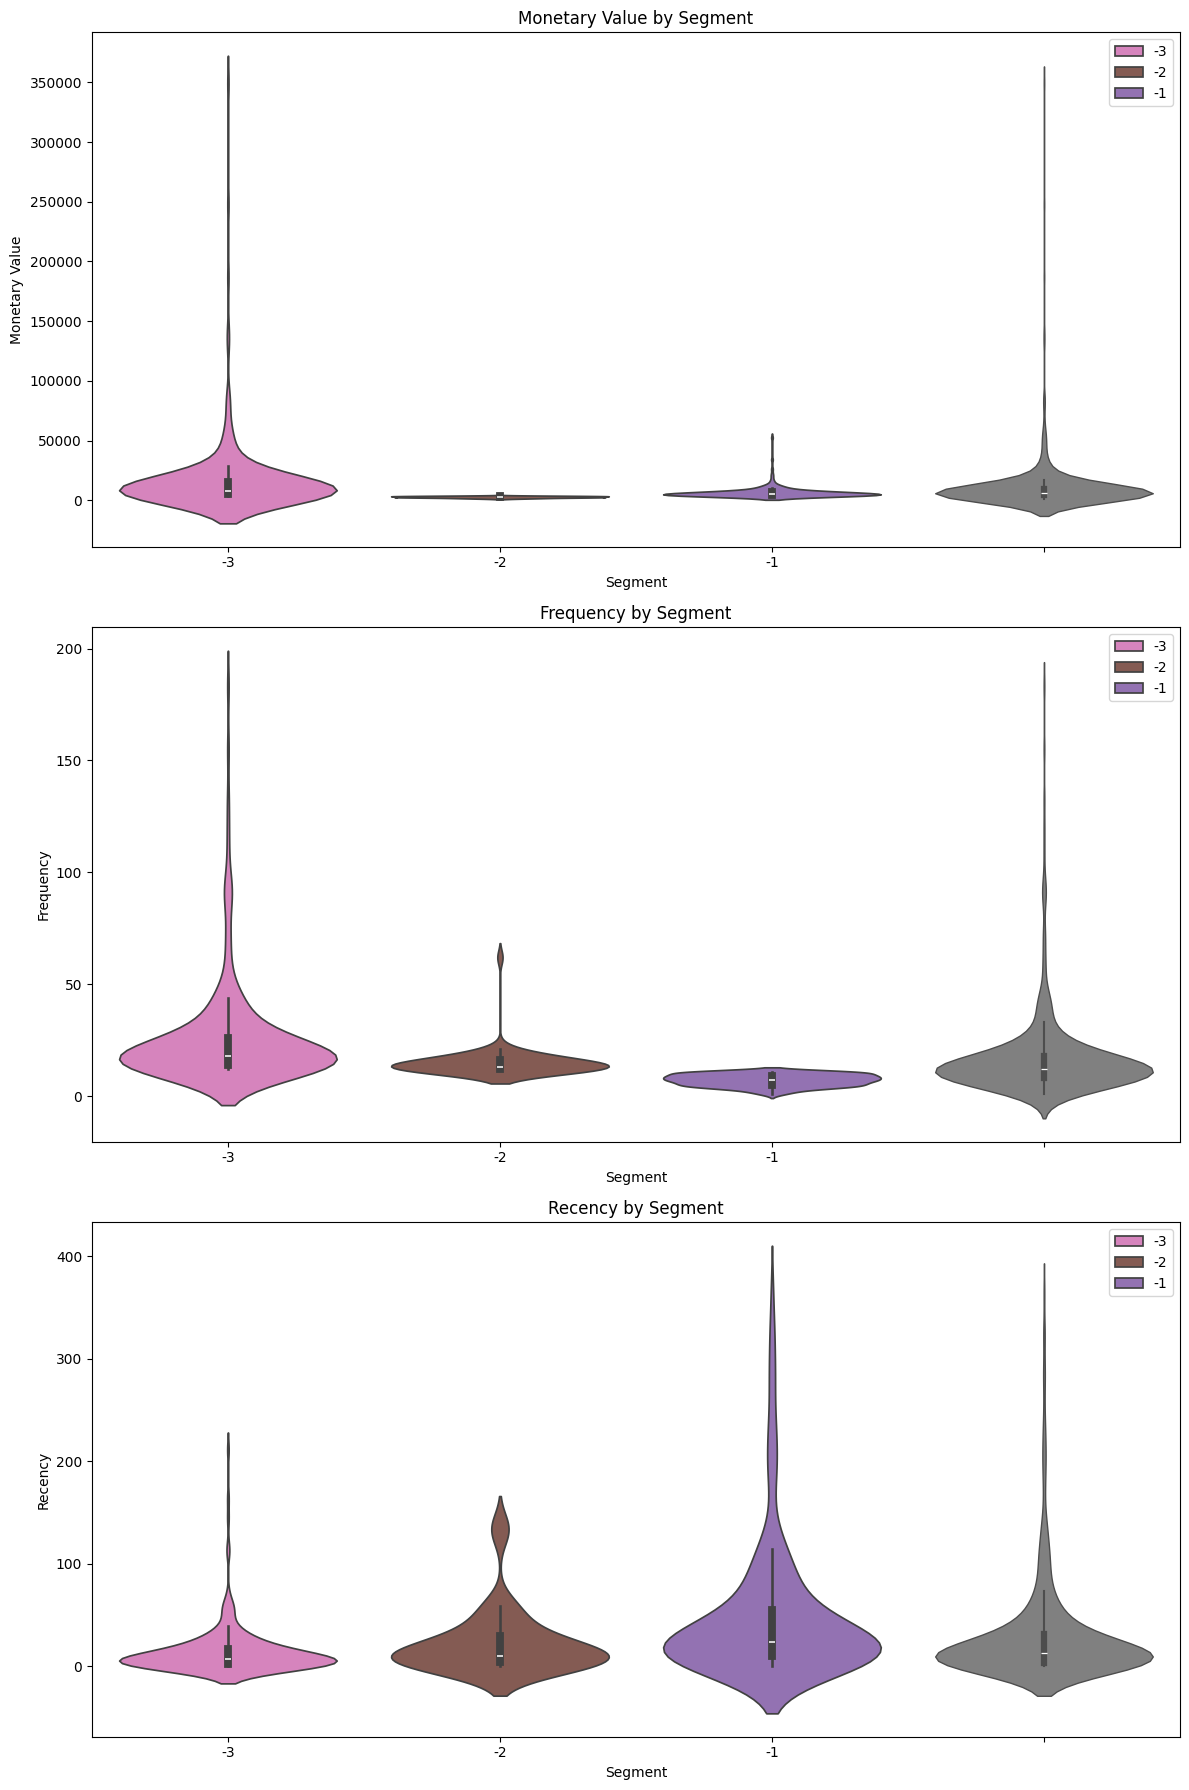

In [16]:
Segment_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outliers_segment_df['Segment'], y=outliers_segment_df['TotalSpent'], palette=Segment_colors, hue=outliers_segment_df["Segment"])
sns.violinplot(y=outliers_segment_df['TotalSpent'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Segment')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outliers_segment_df['Segment'], y=outliers_segment_df['Frequency'], palette=Segment_colors, hue=outliers_segment_df["Segment"])
sns.violinplot(y=outliers_segment_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Segment')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outliers_segment_df['Segment'], y=outliers_segment_df['Recency'], palette=Segment_colors, hue=outliers_segment_df["Segment"])
sns.violinplot(y=outliers_segment_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Segment')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

### Adding Segment Lables

* Segment -1 (Monetary Outliers) PAMPER:
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* Segment -2 (Frequency Outliers) UPSELL:
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* Segment -3 (Monetary & Frequency Outliers) DELIGHT:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [17]:
cluster_labels = {
  -1: 'Pamper',
  -2: 'Upsell',
  -3: 'Delight'
}

outliers_segment_df['SegmentLabel'] = outliers_segment_df['Segment'].map(cluster_labels)
outliers_segment_df.head()

,TotalSpent,Frequency,FirstInvoiceDate,LastInvoiceDate,CustomerLifespan,Recency,Segment,SegmentLabel
Customer ID,,,,,,,,
12357.0,11229.99,1,2010-11-16 10:05:00,2010-11-16 10:05:00,1,23,-1,Pamper
12380.0,4782.84,4,2010-02-15 12:05:00,2010-08-31 14:54:00,197,100,-1,Pamper
12409.0,12346.62,4,2010-05-23 15:21:00,2010-10-15 10:24:00,144,55,-1,Pamper
12415.0,19468.84,4,2010-06-30 08:30:00,2010-11-29 15:07:00,152,10,-1,Pamper
12431.0,4145.52,11,2010-01-15 09:04:00,2010-12-01 10:03:00,320,8,-1,Pamper


### Exporting Data

In [18]:
outliers_segment_df.to_csv('../data/processed/customer_metrics_outliers.csv')